In [1]:
# ! pip install numpy pandas matplotlib seaborn scikit-learn plotly

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

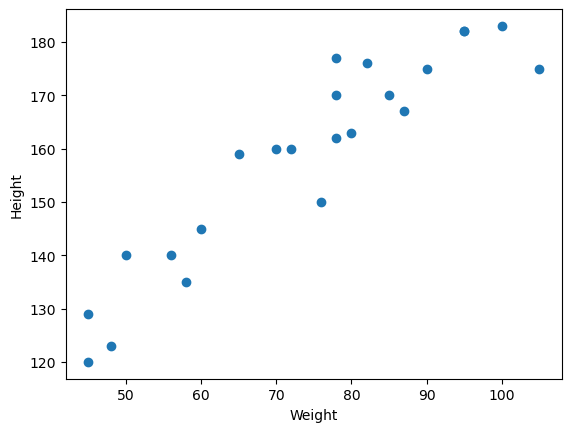

In [5]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
# finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


- highly correlated

<Axes: >

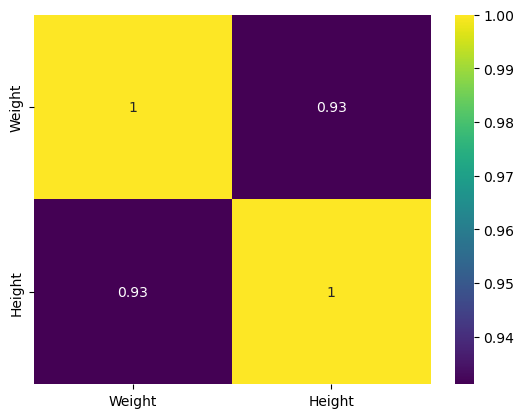

In [7]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

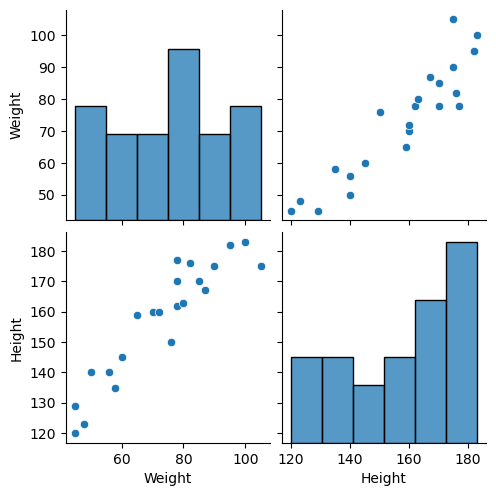

In [8]:
sns.pairplot(df)

# Dividing Independendent and Dependent feature
- Independent should be DataFrame/2D Form
- Dependent should be Series/1D Form

In [9]:
X = df['Weight']

In [10]:
type(X)

pandas.core.series.Series

In [11]:
X = df[['Weight']]
type(X)

pandas.core.frame.DataFrame

In [12]:
y = df['Height']

In [13]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [14]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 1) (5, 1) (18,) (5,)


# Standardization
- if we tried apply get global minima it would take time to reach/find it from datapoint cause it apply math to bigger value, which takes time.
- So we use standization(z-score) - which converts a independent feature into **`(Mean = 0 and Std = 1)`**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

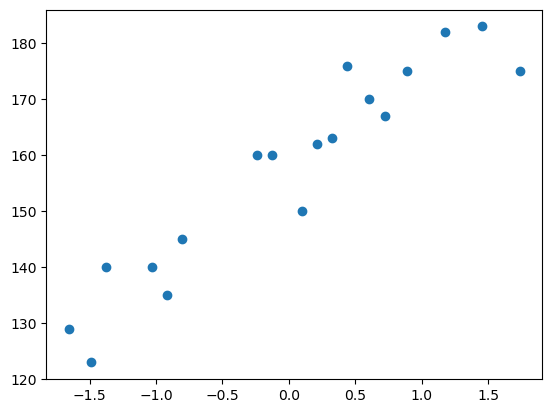

In [22]:
plt.scatter(X_train, y_train)

# Apply Simple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression(n_jobs=-1)

In [25]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

# Finding slope and intercept
- 1 unit movement in weight value it leads to 17.29 unit movement in height
- when 156 point meeting intercept

In [26]:
print(f'Coeficient Or Slope: {reg.coef_}')

Coeficient Or Slope: [17.03440872]


In [27]:
print(f'Intercept: {reg.intercept_}')

Intercept: 157.5


# Plotting BFL - Best Fit Line & Predicting Train data

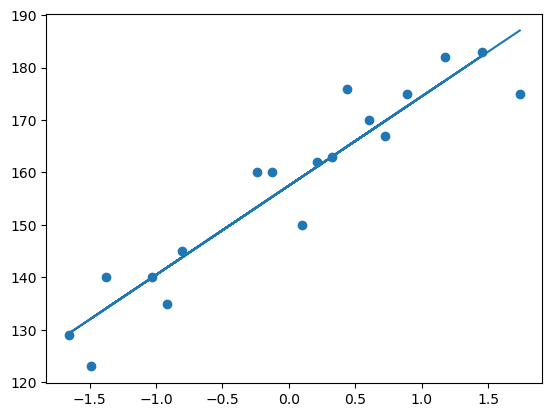

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train))

# Predicting Test data
1. predicted height output = intercept + coef * weights
2. y_pred = 156.47 + 17.29 * X_test

In [29]:
y_pred = reg.predict(X_test)

In [30]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

# Performance Metrics

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'root_mean_squared_error: {rmse}')

mean_squared_error: 109.77592599051654
mean_absolute_error: 9.822657814519227
root_mean_squared_error: 10.477400726827076


# RSquare
- R^2 = 1 - SSR/SST
- R^2 = coeficient of determination SSR = sum of squares of resuidials SST = total sum of sqaures

In [33]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test, y_pred)
score

0.7769869860423441

# Adjusted RSquare
- AdR^2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
- R2 = The R2 of the model n: the number of observations k: the number of predictor variables

In [35]:
1 -  (1 - score) * (len(y_test) -1 ) / (len(y_test) - X_test.shape[1] -1)

0.7026493147231254

# LR Using OLS

In [36]:
# ! pip install statsmodels

In [37]:
import statsmodels.api as sm

In [38]:
model = sm.OLS(y_train, X_train).fit()

In [39]:
model

In [40]:
prediction = model.predict(X_test)

In [41]:
prediction

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

# Model Summary Using OLS

In [42]:
model.summary()

c:\Users\anoop\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 10 Sep 2024   Prob (F-statistic):                       0.661
Time:                        11:18:30   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction For New Data
-Standardization - Transform 

In [43]:
reg.predict(scaler.transform([[72]]))

c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])

In [44]:
scaled_weight = scaler.transform([[80]])

c:\Users\anoop\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
scaled_weight

array([[0.32350772]])

In [49]:
reg.predict([scaled_weight[0]])

array([163.01076266])

# Assumptions
- Sould be linearly distributed
- Should be normally distributed
- Should folloe uniform distribution

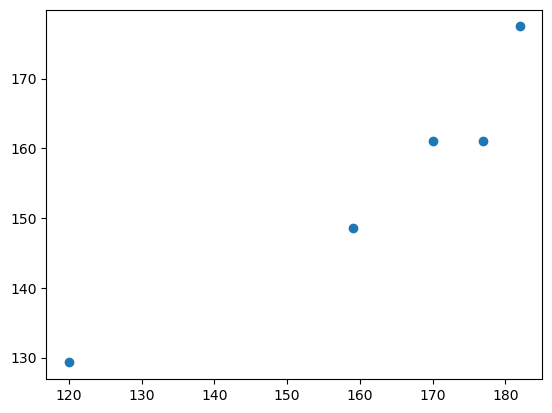

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
residulas = y_test, y_pred
residulas

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

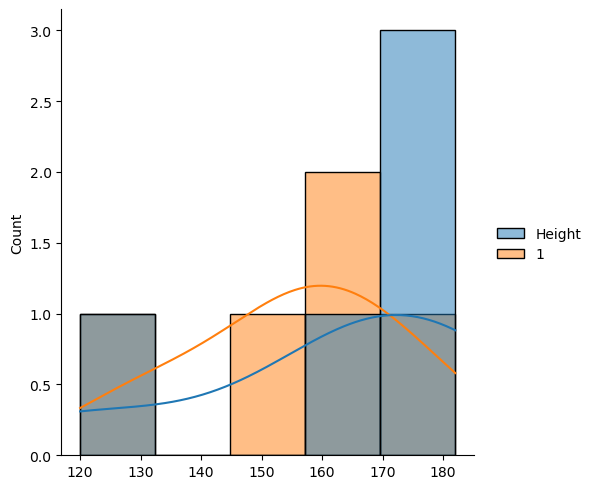

In [53]:
sns.displot(residulas, kde = True)